In [1]:
%matplotlib inline
if __package__ is None:
    import sys, os
    sys.path.append(os.path.realpath("/data/shared/Software/"))
from CMS_Deep_Learning.utils.archiving import *
from CMS_Deep_Learning.layers.slice import Slice
from CMS_Deep_Learning.layers.lorentz import Lorentz
from keras.utils.visualize_util import plot
from IPython.display import Image, display
from CMS_Deep_Learning.utils.colors import colors_contrasting
from CMS_Deep_Learning.utils.analysistools import *
from CMS_Deep_Learning.utils.plot import *
from CMS_Deep_Learning.utils.metrics import *
import numpy as np
from CMS_Deep_Learning.utils.plot import plot_history, print_accuracy_m
archive_dir = "/data/shared/Delphes/keras_archive/"

#def sortTrialsOn(lst):
    

Using Theano backend.
Using gpu device 1: GeForce GTX TITAN X (CNMeM is disabled, cuDNN 5005)

Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
trials = get_trials_by_name("LSTM", archive_dir)
#trials = findWithMetrics(trials, {"useObjTypeColumn" : True})
trials = [t for t in trials if t.is_complete()]
for trial in trials:
    trial.summary(showTraining=False,showValidation=False, showFit=False, showCompilation=False)
print("TotalNumber of Trials:", len(trials)) 

--------------------------------------------------
TRIAL SUMMARY (1d645dbd33ca1a4ec695e8cc49d4a4b6f848efda)
    Record_Info:
        name = [u'LSTM'], elapse_time = 4:14:32
        val_acc = 0.7873
        num_train = 150000
        activation = tanh, depth = 1, dropout = 0.0, labels = [u'qcd', u'ttbar'], lstm_dropout = 0.0, num_val = 150000, output_activation = softmax, patience = 8, query = None, sort_on = Eta, useObjTypeColumn = True
--------------------------------------------------
--------------------------------------------------
TRIAL SUMMARY (0131079e4a5cbf5fba3ddcfbf3182f8e10c4fb17)
    Record_Info:
        name = [u'LSTM'], elapse_time = 6:41:01
        val_acc = 0.8388
        num_train = 225000
        activation = tanh, depth = 1, dropout = 0.0, labels = [u'ttbar', u'wjet', u'qcd'], lstm_dropout = 0.0, num_val = 225000, output_activation = softmax, patience = 8, query = None, sort_on = Eta, useObjTypeColumn = True
--------------------------------------------------
-------

DataProcedure results '3d5a9733451c92cb0218483c196cbfdddbfef850' read from archive
DataProcedure results '3d5a9733451c92cb0218483c196cbfdddbfef850' read from archive
(6656, <function accum at 0x7fe0c66cb320>)
DataProcedure results 'b0d2e70c8ce8da5b7f3d72e0b13c5903d31d9a6e' read from archive
(13312, <function accum at 0x7fe0c66cb320>)
DataProcedure results 'd98f680cc56e031aa5628ea06fed897114da8d63' read from archive
(19968, <function accum at 0x7fe0c66cb320>)
DataProcedure results '8b7e1b8f2adb522fcfd7db093e177e1ad338b10f' read from archive
(26624, <function accum at 0x7fe0c66cb320>)
DataProcedure results 'c25499a8cc215657bdc064ea5fabaed38bde0dda' read from archive
(33280, <function accum at 0x7fe0c66cb320>)
DataProcedure results '50dbc7e3c8e46540591888eba93c498dda9a898e' read from archive
(39936, <function accum at 0x7fe0c66cb320>)
DataProcedure results '683fd2e2366d79a0123701dd2182f00137a2e227' read from archive
(40000, <function accum at 0x7fe0c66cb320>)


/usr/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:476: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


AttributeError: 'NoneType' object has no attribute 'get_title'

/usr/lib/python2.7/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


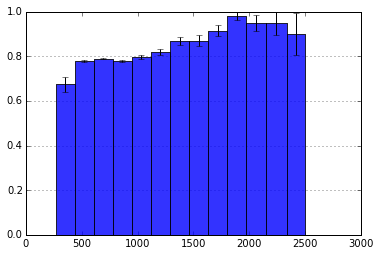

In [5]:
#import sklearn

trial = trials[0]

observable_ordering=['E/c', 'Px', 'Py', 'Pz', 'PT_ET','Eta', 'Phi', 'Charge', 'X', 'Y', 'Z', 
                     'Dxy', 'Ehad', 'Eem', 'MuIso', 'EleIso', 'ChHadIso','NeuHadIso','GammaIso']
object_ordering=["Electron", "MuonTight", "MissingET","EFlowPhoton", "EFlowNeutralHadron", "EFlowTrack"]

#=d = accVsEventChar(trial, None, np.sum, "PT_ET", objects=["EFlowPhoton","EFlowNeutralHadron","EFlowTrack"], 
#                       observable_ordering=observable_ordering,object_ordering=object_ordering,
#                       bins=20,custom_objects={"Slice": Slice, "Lorentz": Lorentz},equalBins=False)
d = accVsEventChar(trial, None, np.sum, "PT_ET", objects=["EFlowPhoton","EFlowNeutralHadron","EFlowTrack"],
                       observable_ordering=observable_ordering,object_ordering=object_ordering,
                       bins=20,custom_objects={"Slice": Slice, "Lorentz": Lorentz},equalBins=False, plot=True)
#assert set([t for t in d.items()]) == set([t for t in d2.items()])
#def plot_ROC(trial):
#    X,Y = 
#    sklearn.metrics.roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)

In [4]:
trial = trials[0]

data_it = TrialIterator(trial, return_prediction=True)
Y, pred= data_it.asList()
print(len(Y[0]), pred.shape)
#print(len(Y[0]))
#print(len(Y[0][0]))

#print(data_it.getLength())
#print()
    
#iterateValidation(trial)

DataProcedure results '3d5a9733451c92cb0218483c196cbfdddbfef850' read from archive
DataProcedure results '3d5a9733451c92cb0218483c196cbfdddbfef850' read from archive
(6656, None)
DataProcedure results 'b0d2e70c8ce8da5b7f3d72e0b13c5903d31d9a6e' read from archive


KeyboardInterrupt: 

In [ ]:
trials = findWithMetrics(trials, {"useObjTypeColumn" : True})
print_by_labels(trials, 4)

#plot_history([("Fully connected:", trials[0].get_history())], plotLoss=False)


In [ ]:
t = findWithMetrics(trials, {"labels" : [u'ttbar', u'wjet', u'qcd'], 'sort_on' : "Phi"})
t[0].summary(showCompilation=True, showFit=True)

In [ ]:
plotEverything(trials)
    
    


In [ ]:
phi = findWithMetrics(trials,{"sort_on" : "Phi"})
eta = findWithMetrics(trials,{"sort_on" : "Eta"})
PT = findWithMetrics(trials,{"sort_on" : "PT_ET"})
sortOnMetric(phi, "labels")
sortOnMetric(eta, "labels")
sortOnMetric(PT, "labels")
labelGroups = zip(phi,eta,PT)

In [ ]:
colors = [(0,0,1.0),(.25,.75,.25), (1,.65,0)]
names = ["Phi", "Eta","PT"]
lims = [[.7,.91], [.8,1.0],  [.8,1.0],  [.4,.82]]
for j , tup in enumerate(labelGroups):
    plots = []
    for i, b in enumerate(tup):
        labels = b.get_from_record("labels")
        if(labels == None): labels = b.get_from_record("lables")
        title = str(tuple([str(x) for x in labels])) if(labels != None) else "Cannot Find Labels"
        title = title + " Accuracy vs Epoch"
        name = names[i]
        model = b.get_model(custom_objects={"Slice":Slice, "Lorentz" : Lorentz})
        history = b.get_history()
        color = colors[i]
        plots.append((name, history, color))
    plot_history(plots, plotLoss=False, title=title, acclims=lims[j])
    
    

In [ ]:
data = np.zeros(( len(labelGroups[0]),len(labelGroups) ) ).tolist()
print(data)
columns = [None] * len(labelGroups)
rows = [" "+ n + " " for n in names]

for j , tup in enumerate(labelGroups):
    for i, b in enumerate(tup):
        labels = b.get_from_record("labels")
        columns[j] = str(tuple([str(x) for x in labels]))
        error = getError(b,custom_objects={"Slice":Slice, "Lorentz" : Lorentz}, ignoreAssert=True)
        d = "%.5f %s %.5f" % (b.get_from_record("val_acc"),unichr(177), error)
        data[i][j] = d
        
        
#print(data)
        

In [ ]:
plotTable(rows, columns, data,scale=2, title="Validation Accuracy for LSTM Trials by Classification and Sorting")

In [ ]:
def getTrialBins(trial, bins=20):
    trial.summary()
    d = accVsEventChar(trial, None, np.sum, "PT_ET", ["EFlowPhoton","EFlowNeutralHadron","EFlowTrack"],
                       bins=bins,custom_objects={"Slice": Slice, "Lorentz": Lorentz},equalBins=False)
    #plotBins(d,title='Accuracy vs Sum of PF Candidate PT', xlabel="PT GeV", ylabel='Accuracy', color=(0.553,0.188,0.38))
    return d
eta_bins = [getTrialBins(t,40) for t in eta]
phi_bins = [getTrialBins(t,40) for t in phi]

In [ ]:
colors = [(0,0,1.0),(.25,.75,.25), (1,0,0), (1,.65,0)]
lables = [trial.get_from_record("labels") for trial in eta]
plotBins(eta_bins,mode="scatter",title='Eta-LSTM: Accuracy vs Sum of PF Candidate PT',binLabels=lables, xlabel="PT GeV", ylabel='Accuracy',
         legendTitle="Classification",colors=colors, alpha=.2, ylim=(0.75, 1.025), xlim=(0,3000))

lables = [trial.get_from_record("labels") for trial in phi]
plotBins(phi_bins,mode="scatter",title='Phi-LSTM: Accuracy vs Sum of PF Candidate PT',binLabels=lables, xlabel="PT GeV", ylabel='Accuracy',
         legendTitle="Classification",legendBelow=True,colors=colors, alpha=.4, ylim=(0.75, 1.025), xlim=(0,3000))